In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from linear_regression import *
from scipy import stats

In [2]:
gss = pd.read_csv('../Datasets/gss.csv', low_memory=False) 
gss_2010 = gss.loc[gss["yrint"] == 2010].dropna(subset=['paeduc', 'maeduc', 'age', 'educ'])
X, y = gss_2010[['paeduc', 'maeduc', 'age']], gss_2010['educ']

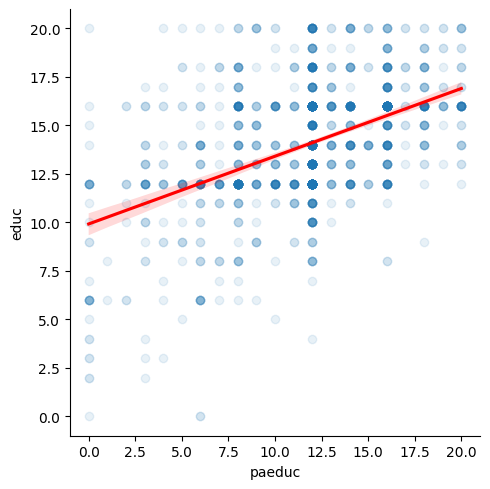

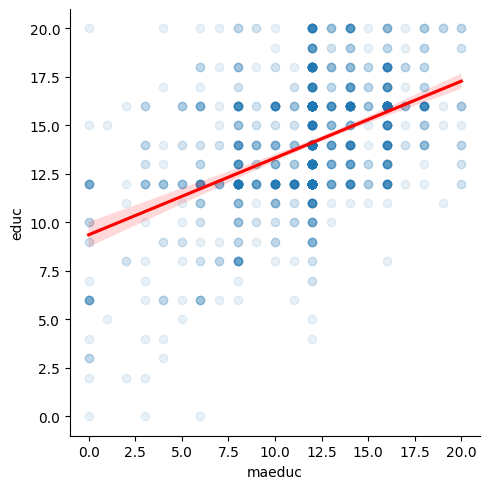

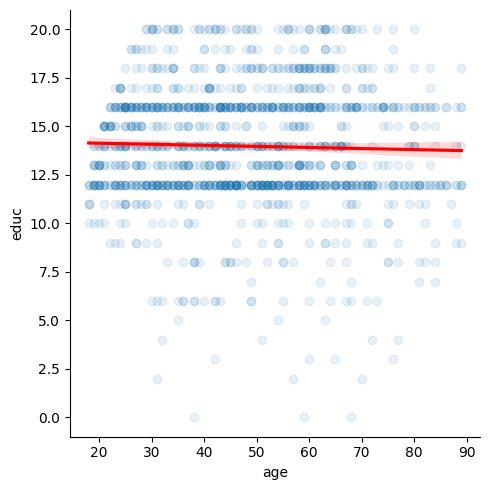

In [3]:
sns.lmplot(x="paeduc", y="educ", data=gss_2010, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
sns.lmplot(x="maeduc", y="educ", data=gss_2010, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
sns.lmplot(x="age", y="educ", data=gss_2010, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
plt.tight_layout()
plt.show()

In [ ]:
X_numpy = np.hstack([np.ones((np.asarray(X, dtype=float) .shape[0], 1)), np.asarray(X, dtype=float)])

X_const = X.copy()
X_const.insert(0, 'const', np.ones(len(X)))

ols_model = LinearRegressionOLS().fit(y, X_const, alpha=0.05)

In [5]:
ols_model

LinearRegressionOLS(alpha=0.05, feature_names=Index(['const', 'paeduc', 'maeduc', 'age'], dtype='object'), target='educ', theta=array([7.32564767, 0.21441961, 0.25693439, 0.02412266]), coefficients=array([0.21441961, 0.25693439, 0.02412266]), intercept=np.float64(7.3256476651519336), degrees_freedom=1398, rss=np.float64(9893.726756472597), tss=np.float64(13663.26961483595), ess=np.float64(3769.542858363267), mse=np.float64(7.077057765717165), rmse=np.float64(2.660274002000013), r_squared=np.float64(0.2758887853804979), r_squared_2=np.float64(0.27588878538049155), std_error_coefficient=array([0.36836415, 0.02414742, 0.02712419, 0.00432393]), t_stat_coefficient=array([19.88697241,  8.87960749,  9.47251919,  5.5788793 ]), p_value_coefficient=array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.90268838e-08]), ci_low=array([6.60304159, 0.16705053, 0.20372589, 0.01564058]), ci_high=array([8.04825374, 0.2617887 , 0.31014289, 0.03260475]))

In [6]:
print(ols_model)

               OLS Summary
Target: educ
R²: 0.2759
F-Statistic: 177.5476

MSE: 7.0771
RMSE: 2.6603
RSS: 9893.7268
ESS: 3769.5429
TSS: 13663.2696

Residual Degrees of Freedom: 1398
Observations : 1402
Features : 3

                                            Model Weights
feature_name  coefficient  std_error_coefficient  t_statistic  p_>_abs_t conf_interval__0.05
       const       7.3256                 0.3684      19.8870        0.0     [6.603, 8.0483]
      paeduc       0.2144                 0.0241       8.8796        0.0    [0.1671, 0.2618]
      maeduc       0.2569                 0.0271       9.4725        0.0    [0.2037, 0.3101]
         age       0.0241                 0.0043       5.5789        0.0    [0.0156, 0.0326]



In [7]:
marginal_effects(X_test=np.array([[0, 0, 0], ]), X_hyp=np.array([[1, 1, 1], ]), model=ols_model)

Marginal Effects Comparison:

Significance Analysis (p > |t|)
1.96 > |-1.3451| == True
 
Accept the null hypothesis: 7.3256 is not statistically different from 7.8211 at 5.0% level
Conclude that outcome of {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0.00'}
does not differ from {'paeduc': '1.00', 'maeduc': '1.00', 'age': '1.00'}


,Marginal Effects - prediction vs. hypothesis
x__prediction_vals,"{'paeduc': '0.00', 'maeduc': '0.00', 'age': '0..."
x__hypothesis_vals,"{'paeduc': '1.00', 'maeduc': '1.00', 'age': '1..."
y__prediction,7.325648
y__hypothesis,7.821124
se__prediction,0.368364
ci__prediction_0.05,"[6.603, 8.0483]"
t_statistic__prediction_hypothesis,-1.345073
p_>_abs_t__prediction_hypothesis,0.17882


In [8]:
prediction_set = [np.array([[0, 0, 0], ]), np.array([[X['paeduc'].mean(), X['maeduc'].mean(), X['age'].mean()], ]), np.array([[X['paeduc'].mean(), 14,  X['age'].mean()], ])] 
pd.concat([model_prediction(i, ols_model) for i in prediction_set], ignore_index=True)

,x__input_vals,y__prediction,se__prediction,t_statistic__prediction,p_>_abs_t__prediction,ci__prediction_0.05
0,"{'paeduc': '0.00', 'maeduc': '0.00', 'age': '0...",7.3256,0.3684,19.8870,0.0,"[6.603, 8.0483]"
1,"{'paeduc': '11.62', 'maeduc': '11.66', 'age': ...",13.9772,0.0710,196.7284,0.0,"[13.8378, 14.1165]"
2,"{'paeduc': '11.62', 'maeduc': '14.00', 'age': ...",14.5786,0.0953,152.9974,0.0,"[14.3917, 14.7656]"


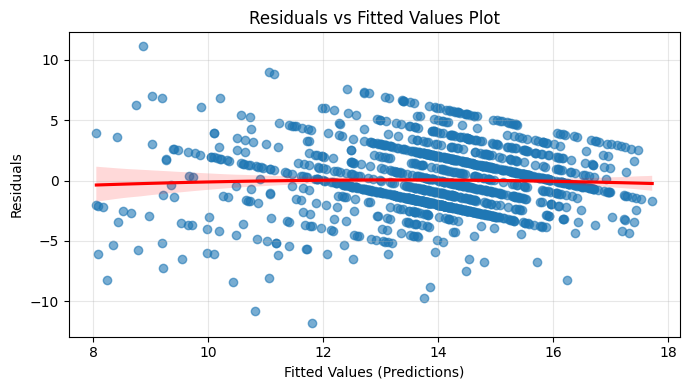

In [9]:
def plot_residuals():
    predictions = ols_model.predict(X)
    residuals = (y - predictions)

    plt.figure(figsize=(7,4))
    sns.regplot(x=predictions, y=residuals, order=2, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

    plt.xlabel('Fitted Values (Predictions)')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted Values Plot')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_residuals()

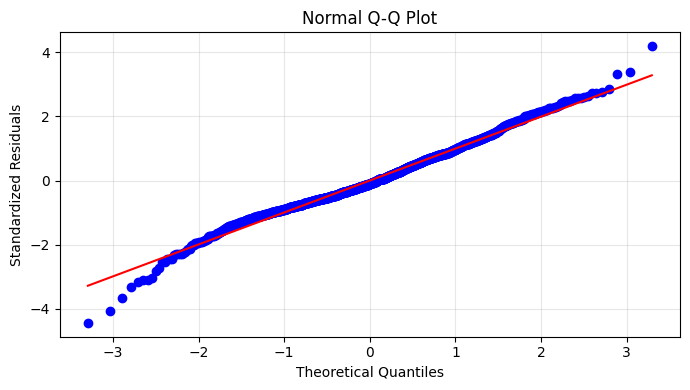

In [10]:
def q_q_plot():
    predictions = ols_model.predict(X)
    residuals = (y - predictions)

    standardized_residuals = residuals / np.std(residuals)
    plt.figure(figsize=(7, 4))
    stats.probplot(standardized_residuals, dist="norm", plot=plt)
    
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.title('Normal Q-Q Plot')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

q_q_plot()

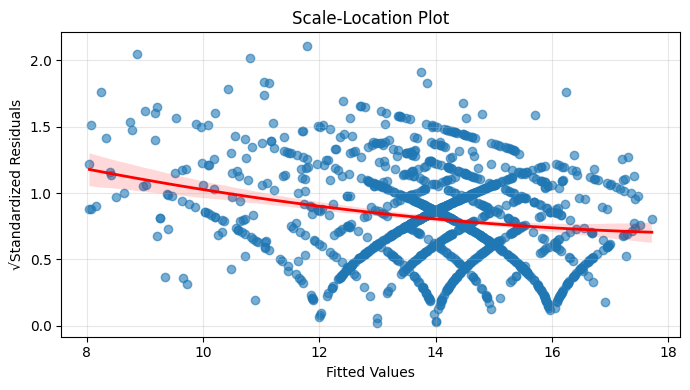

In [11]:
def scale_location_plot():
    predictions = ols_model.predict(X)
    residuals = (y - predictions)

    standardized_residuals = residuals / np.std(residuals)
    sqrt_abs_std_residuals = np.sqrt(np.abs(standardized_residuals))

    plt.figure(figsize=(7, 4))
    sns.regplot(x=predictions, y=sqrt_abs_std_residuals, order=2, 
                scatter_kws={'alpha': 0.6}, 
                line_kws={'color': 'red', 'linewidth': 2})

    plt.xlabel('Fitted Values')
    plt.ylabel('√Standardized Residuals')
    plt.title('Scale-Location Plot')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

scale_location_plot()